/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
  Input Face Image Expected Identity Predicted Identity Correct (Y/N)
0          Image 1         Person 20          Person 20             Y
1          Image 2         Person 28          Person 28             Y
2          Image 3          Person 3           Person 5             N
3          Image 4         Person 21          Person 21             Y
4          Image 5          Person 9           Person 9             Y


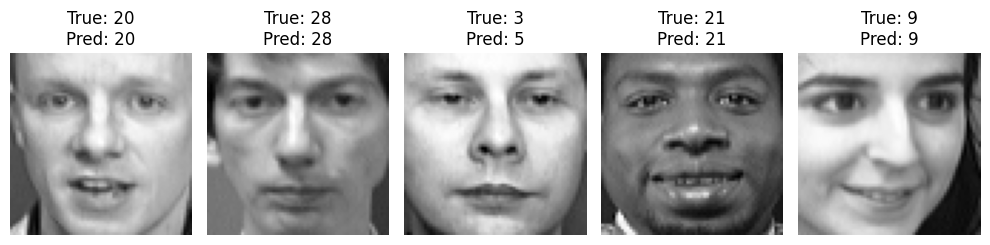

In [2]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd

faces = fetch_olivetti_faces()
X, y = faces.images, faces.target
X = X.reshape(-1, 64, 64, 1).astype('float32')
y_cat = to_categorical(y, num_classes=40)

X_train, X_test, y_train, y_test, y_train_labels, y_test_labels = train_test_split(
    X, y_cat, y, test_size=0.2, random_state=42
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(40, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

num_samples = 5
X_eval = X_test[:num_samples]
y_true_labels = y_test_labels[:num_samples]

y_pred_probs = model.predict(X_eval)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

results = []
for i in range(num_samples):
    expected = f"Person {y_true_labels[i]}"
    predicted = f"Person {y_pred_labels[i]}"
    correct = 'Y' if y_true_labels[i] == y_pred_labels[i] else 'N'
    results.append([f"Image {i+1}", expected, predicted, correct])

df = pd.DataFrame(results, columns=["Input Face Image", "Expected Identity", "Predicted Identity", "Correct (Y/N)"])
print(df)

plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(X_eval[i].reshape(64, 64), cmap='gray')
    plt.title(f"True: {y_true_labels[i]}\nPred: {y_pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()